In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import pandas as pd
import seaborn as sns

import operator
import itertools

from sklearn import metrics
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.inspection import permutation_importance

from sklearn import ensemble
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import PCA, KernelPCA, FastICA

from joblib import dump, load
import pickle
import pandas as pd
import sys

import time

In [2]:
n_jobs = -1

In [3]:
cols = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] + [f"RDm{i}" for i in range(1, 47)] + [f"RDa{i}" for i in range(1, 47)] + [f"RVTm{i}" for i in range(1, 47)] + [f"RVTa{i}" for i in range(1, 47)] + [f"RVV{i}" for i in range(1, 47)]

In [4]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)

df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [5]:
df.columns


Index(['x_s', 'time_s', 'Temp', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'RVV38', 'RVV39', 'RVV40', 'RVV41', 'RVV42', 'RVV43', 'RVV44', 'RVV45',
       'RVV46', 'RVV47'],
      dtype='object', length=289)

In [ ]:
#RDm

In [6]:
xB = df.iloc[:, :54].values 
yB = df.iloc[:,54:101].values  

In [7]:
 df.iloc[:, :54]

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,X42,X43,X44,X45,X46,X47,X48,rho,v,p
0,0.000000,0.000000e+00,10757.1660,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,2.231710e-150,8.870698e-153,4.043625e-155,2.113864e-157,1.267290e-159,8.713009e-162,0.000000e+00,0.006989,810.67267,22324.995
1,0.000004,8.216688e-12,10757.1460,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,1.535575e-28,1.675730e-28,1.824564e-28,1.982113e-28,2.148079e-28,2.309744e-28,8.220368e-10,0.006989,810.67080,22325.006
2,0.000008,1.643338e-11,10757.1260,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,7.916455e-28,8.638381e-28,9.404773e-28,1.021571e-27,1.106897e-27,1.188562e-27,1.644074e-09,0.006989,810.66892,22325.016
3,0.000012,2.465006e-11,10757.1060,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,2.272709e-27,2.479758e-27,2.699481e-27,2.931863e-27,3.176013e-27,3.404999e-27,2.466111e-09,0.006989,810.66705,22325.027
4,0.000029,6.058392e-11,10757.0200,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,2.990314e-26,3.260812e-26,3.547118e-26,3.848727e-26,4.160931e-26,4.416154e-26,6.061110e-09,0.006989,810.65886,22325.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,94199.957000,1.990592e-01,6329.2381,0.333110,0.196418,1.165720e-01,6.963500e-02,4.186787e-02,2.533694e-02,1.543289e-02,...,2.686903e-08,2.067579e-08,1.601371e-08,1.248366e-08,9.795160e-09,7.735728e-09,1.764616e-01,0.011731,482.94584,24181.782
1932,94726.552000,2.001719e-01,6329.2380,0.333110,0.196418,1.165720e-01,6.963500e-02,4.186787e-02,2.533694e-02,1.543289e-02,...,2.686903e-08,2.067578e-08,1.601371e-08,1.248365e-08,9.795158e-09,7.735727e-09,1.764616e-01,0.011731,482.94585,24181.782
1933,95253.146000,2.012847e-01,6329.2379,0.333110,0.196418,1.165720e-01,6.963500e-02,4.186787e-02,2.533694e-02,1.543289e-02,...,2.686902e-08,2.067578e-08,1.601370e-08,1.248365e-08,9.795157e-09,7.735725e-09,1.764616e-01,0.011731,482.94586,24181.782
1934,97913.156000,2.069057e-01,6329.2376,0.333110,0.196418,1.165720e-01,6.963500e-02,4.186787e-02,2.533694e-02,1.543289e-02,...,2.686901e-08,2.067577e-08,1.601369e-08,1.248364e-08,9.795149e-09,7.735719e-09,1.764615e-01,0.011731,482.94590,24181.781


In [8]:
df.iloc[:,54:101]

,RDm1,RDm2,RDm3,RDm4,RDm5,RDm6,RDm7,RDm8,RDm9,RDm10,...,RDm38,RDm39,RDm40,RDm41,RDm42,RDm43,RDm44,RDm45,RDm46,RDm47
0,-1.288026e+24,-3.032245e+19,-8.137560e+14,-2.489514e+10,-8.682107e+05,-3.451645e+01,-1.564291e-03,-8.081633e-08,-4.759608e-12,-3.195461e-16,...,-5.714233e-110,-1.712932e-112,-5.853462e-115,-2.280215e-117,-1.012579e-119,-5.125930e-122,-2.958057e-124,-1.945947e-126,-1.459303e-128,-1.247529e-130
1,-1.287980e+24,-7.686683e+19,-6.162078e+15,-6.776741e+11,-1.008668e+08,-1.399273e+04,6.746723e+03,7.952491e+03,9.346624e+03,1.096132e+04,...,3.930387e+05,4.327369e+05,4.753937e+05,5.210987e+05,5.699274e+05,6.219378e+05,6.771680e+05,7.356329e+05,7.973220e+05,8.622136e+05
2,-1.287934e+24,-1.234053e+20,-1.499811e+16,-2.329934e+12,-4.577995e+08,-8.902559e+04,2.697330e+04,3.181026e+04,3.738685e+04,4.384569e+04,...,1.571971e+06,1.730678e+06,1.901186e+06,2.083840e+06,2.278926e+06,2.486656e+06,2.707157e+06,2.940454e+06,3.186466e+06,3.445098e+06
3,-1.287888e+24,-1.699378e+20,-2.739423e+16,-5.419271e+12,-1.307308e+09,-3.292656e+05,6.063334e+04,7.157374e+04,8.412122e+04,9.865374e+04,...,3.536417e+06,3.893272e+06,4.276582e+06,4.687093e+06,5.125404e+06,5.591933e+06,6.086893e+06,6.610254e+06,7.161724e+06,7.741081e+06
4,-1.287687e+24,-3.733704e+20,-1.206182e+17,-4.807007e+13,-2.415032e+10,-1.494561e+07,3.550949e+05,4.323533e+05,5.081616e+05,5.959500e+05,...,2.134471e+07,2.349250e+07,2.579695e+07,2.826149e+07,3.088828e+07,3.367802e+07,3.662966e+07,3.974012e+07,4.300450e+07,4.642470e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,6.460443e+13,7.701144e+13,9.160163e+13,1.087201e+14,1.287597e+14,1.521608e+14,1.794220e+14,2.111020e+14,2.478371e+14,2.903392e+14,...,2.875365e+15,2.339519e+15,1.799671e+15,1.301121e+15,8.788246e+14,5.513162e+14,3.196470e+14,1.711279e+14,8.653009e+13,4.825211e+13
1932,6.203084e+13,7.398031e+13,8.804009e+13,1.045447e+14,1.238787e+14,1.464622e+14,1.727880e+14,2.033973e+14,2.389081e+14,2.800129e+14,...,2.801528e+15,2.280160e+15,1.754688e+15,1.269388e+15,8.579352e+14,5.383873e+14,3.120194e+14,1.672927e+14,8.495811e+13,4.825345e+13
1933,6.221992e+13,7.417886e+13,8.824420e+13,1.047492e+14,1.240743e+14,1.466427e+14,1.729383e+14,2.035006e+14,2.389444e+14,2.799579e+14,...,2.780184e+15,2.262269e+15,1.740425e+15,1.258499e+15,8.501780e+14,5.333657e+14,3.091843e+14,1.655649e+14,8.378606e+13,4.693822e+13
1934,6.184571e+13,7.372781e+13,8.770175e+13,1.040983e+14,1.232943e+14,1.457112e+14,1.718284e+14,2.021809e+14,2.373789e+14,2.781050e+14,...,2.758001e+15,2.244123e+15,1.726384e+15,1.248247e+15,8.431885e+14,5.290051e+14,3.067062e+14,1.642560e+14,8.312982e+13,4.649404e+13


In [9]:
x_train, x_test, y_train, y_test = train_test_split(xB, yB, train_size=0.75, test_size=0.25, random_state=69)

In [10]:
print("x=",x_train.shape)
print("y=",y_train.shape)

x= (1452, 54)
y= (1452, 47)


In [15]:
y_train.shape

(1452, 47)

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)#.reshape(-1,1))

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)

In [17]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1452, 54)
Training Labels Shape: (1452, 47)
Testing Features Shape: (484, 54)
Testing Labels Shape: (484, 47)


In [18]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]

In [19]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

In [26]:
y_train.shape

(1452, 47)

In [27]:
t0 = time.time()
gs.fit(x_train, y_train)
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Complexity and bandwidth selected and model fitted in 15.861081 s


In [28]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()


The model performance for training set
--------------------------------------
MAE is 2.9986275147416404e+20
MSE is 2.3058820592872087e+42
EVS is 0.9999680999885519
R2 score is 0.9999680735075132

The model performance for testing set
--------------------------------------
MAE is 7.131321364233298e+20
MSE is 1.0742512575215543e+43
EVS is 0.9998953969540214
R2 score is 0.999894772125574

Best parameters set found on development set:
{}



In [29]:
regr = ExtraTreesRegressor(**gs.best_params_)

In [31]:
# Training
t0 = time.time()
regr.fit(x_train, y_train)
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)

Complexity and bandwidth selected and model fitted in 3.334199 s


In [32]:
results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00067
Feature: 1, Score: 0.00056
Feature: 2, Score: 0.01452
Feature: 3, Score: 0.00043
Feature: 4, Score: 0.00439
Feature: 5, Score: 0.00100
Feature: 6, Score: 0.00066
Feature: 7, Score: 0.00158
Feature: 8, Score: 0.00360
Feature: 9, Score: 0.00917
Feature: 10, Score: 0.00350
Feature: 11, Score: 0.00050
Feature: 12, Score: 0.00117
Feature: 13, Score: 0.00028
Feature: 14, Score: 0.00043
Feature: 15, Score: 0.00106
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.00013
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.00047
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00020
Feature: 23, Score: 0.00008
Feature: 24, Score: 0.00008
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00004
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00010
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00004
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00028
Feature: 35, Score: 0.00001
Fe

C:\Users\user\AppData\Local\Temp/ipykernel_21032/2161978590.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RDm.pdf", dpi=150, crop='true')


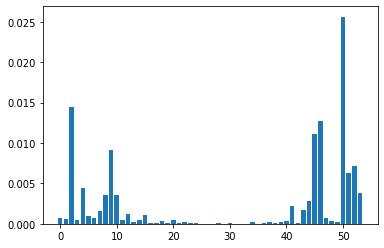

In [49]:
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RDm.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [34]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)

importances_mea =  [6.73852506e-04 5.64593387e-04 1.45151081e-02 4.28880008e-04
 4.38651758e-03 1.00300642e-03 6.60900246e-04 1.58265772e-03
 3.59757893e-03 9.17366403e-03 3.50262533e-03 5.01945209e-04
 1.17426409e-03 2.75671850e-04 4.29937634e-04 1.05922150e-03
 1.11391489e-04 1.28379112e-04 3.42183740e-04 3.88106017e-05
 4.69073603e-04 5.95226485e-05 1.96095906e-04 8.43451670e-05
 8.21050582e-05 1.64798579e-05 1.98454190e-05 1.78779899e-05
 4.23018256e-05 2.60921454e-05 9.77911168e-05 2.99809012e-05
 3.57436277e-05 2.60333588e-05 2.81975801e-04 1.38308451e-05
 7.80266404e-05 2.11995069e-04 8.41354702e-05 2.50673747e-04
 2.91746216e-04 2.19975478e-03 4.58501229e-05 1.64786739e-03
 2.83025076e-03 1.11212556e-02 1.27164980e-02 7.26982858e-04
 3.74935947e-04 1.74666237e-04 2.56284361e-02 6.25783183e-03
 7.19815363e-03 3.84603882e-03]
importances_std =  [1.87362481e-05 2.48392996e-05 3.51030111e-04 1.18825611e-05
 2.04280304e-04 3.78332175e-05 2.23260840e-05 8.70901288e-05
 1.34485715e-04

In [35]:
# Principal Component Analysis (PCA)
####################################
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
#pca = PCA(n_components=2, svd_solver='full')
# pca = PCA(n_components=2, svd_solver='arpack')
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[2.43041014e+02 1.15313047e+02 5.84798062e+01 3.65278073e+01
 3.14169681e+01 1.52849258e+01 7.67203676e+00 2.65994389e+00
 9.35647019e-01 4.87859465e-01 2.82768778e-01 1.11866410e-01
 4.51091476e-02 1.36904406e-02 1.08879888e-02 3.82806220e-03
 2.14635172e-03 9.48358416e-04 3.27460968e-04 1.67371849e-04
 6.42392368e-05 3.71059952e-05 1.57814074e-05 1.28845013e-05
 9.86211059e-06 9.33819987e-06 4.41436340e-06 3.85202683e-06
 2.32521388e-06 1.84877334e-06 1.56231902e-06 1.54203362e-06
 1.34165341e-06 1.26705542e-06 1.08424859e-06 1.02809265e-06
 9.86047736e-07 8.76002114e-07 8.39965206e-07 7.94884373e-07
 7.60502907e-07 7.25621067e-07 6.76601487e-07 6.55083751e-07
 5.84805751e-07 5.56637082e-07 4.59079220e-07 4.42536989e-07
 3.94852607e-07 3.85471458e-07 3.03705971e-07 2.50406940e-07
 2.41599367e-07 2.25962011e-07]

Variances (Percentage):
[7.53353412e+01 1.69588546e+01 4.36165663e+00 1.70171501e+00
 1.25883313e+00 2.97965714e-01 7.50690594e-02 9.02369850e-03
 1.11651278e-03

C:\Users\user\AppData\Local\Temp/ipykernel_21032/3422432206.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RDm.pdf", dpi=150, crop='true')


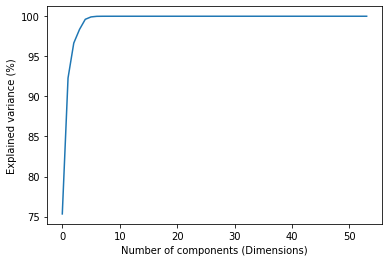

In [48]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RDm.pdf", dpi=150, crop='true')
plt.show()
plt.close()


In [37]:
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))


Prediction for 484 inputs in 0.022518 s


In [38]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)

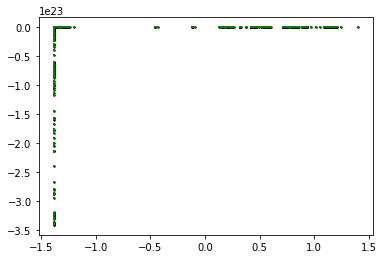

In [41]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:,1], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:,1], s=2, c='g', marker='+', label='ExtraTrees')

C:\Users\user\AppData\Local\Temp/ipykernel_21032/3074814884.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RDm.pdf", dpi=150, crop='true')


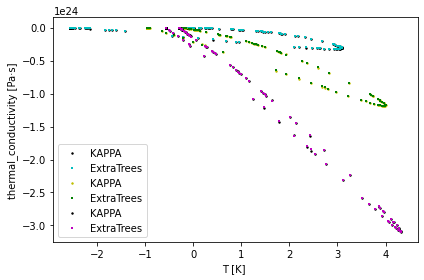

In [47]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:,10], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,10], y_regr_dim[:,10], s=2, c='c', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,20], y_test_dim[:,20], s=2, c='y', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,20], y_regr_dim[:,20], s=2, c='g', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,30], y_test_dim[:,30], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,30], y_regr_dim[:,30], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('thermal_conductivity [Pa·s]')  #&&&&&&&&&&&
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RDm.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [46]:
# save the model to disk
dump(gs, 'N2N_1.sav')

['N2N_1.sav']

In [ ]:
# RDa

In [66]:
xa = df.iloc[:, :54].values 
ya = df.iloc[:,101:148].values 

In [57]:
x_train, x_test, y_train, y_test = train_test_split(xa, ya, train_size=0.75, test_size=0.25, random_state=69)

In [59]:
y_train

array([[-0.01728763, -0.02002035, -0.02216749, ...,  0.17377963,
         0.20013739,  0.21947342],
       [ 0.31674585,  0.31504083,  0.31397309, ...,  0.28865663,
         0.28483372,  0.28126953],
       [ 0.3167481 ,  0.31504308,  0.31397535, ...,  0.28865735,
         0.28483424,  0.2812699 ],
       ...,
       [ 0.31674968,  0.31504466,  0.31397693, ...,  0.28865784,
         0.28483459,  0.28127015],
       [ 0.31674559,  0.31504056,  0.31397282, ...,  0.28865654,
         0.28483366,  0.28126949],
       [ 0.31673942,  0.31503438,  0.31396663, ...,  0.28865466,
         0.28483232,  0.28126856]])

In [61]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)#.reshape(-1,1))

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)

ValueError: could not convert string to float: '0-0.000000000000E+00'

In [ ]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]

In [ ]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

In [ ]:
t0 = time.time()
gs.fit(x_train, y_train)
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)

In [ ]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()

In [ ]:
regr = ExtraTreesRegressor(**gs.best_params_)

In [ ]:
# Training
t0 = time.time()
regr.fit(x_train, y_train)
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)

In [ ]:
results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RDa.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [ ]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)

In [ ]:
# Principal Component Analysis (PCA)
####################################
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
#pca = PCA(n_components=2, svd_solver='full')
# pca = PCA(n_components=2, svd_solver='arpack')
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

In [ ]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RDa.pdf", dpi=150, crop='true')
plt.show()
plt.close()


In [ ]:
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))

In [ ]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)

In [ ]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:,1], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:,1], s=2, c='g', marker='+', label='ExtraTrees')

In [ ]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:,10], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,10], y_regr_dim[:,10], s=2, c='c', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,20], y_test_dim[:,20], s=2, c='y', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,20], y_regr_dim[:,20], s=2, c='g', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,30], y_test_dim[:,30], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,30], y_regr_dim[:,30], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('thermal_conductivity [Pa·s]')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RDa.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [ ]:
# save the model to disk
dump(gs, 'N2N_RDa.sav')

In [ ]:
#RVTm

In [64]:
xv = df.iloc[:, :54].values 
yv = df.iloc[:,148:195].values 

In [65]:
x_train, x_test, y_train, y_test = train_test_split(xv, yv, train_size=0.75, test_size=0.25, random_state=69)

In [68]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)#.reshape(-1,1))

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)

In [69]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1452, 54)
Training Labels Shape: (1452, 47)
Testing Features Shape: (484, 54)
Testing Labels Shape: (484, 47)


In [70]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]

In [71]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

In [73]:
t0 = time.time()
gs.fit(x_train, y_train)
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Complexity and bandwidth selected and model fitted in 27.661270 s


In [74]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()


The model performance for training set
--------------------------------------
MAE is 4.5208635471395556e+23
MSE is 9.941847557757343e+49
EVS is 0.9999458269188224
R2 score is 0.9999454939570649

The model performance for testing set
--------------------------------------
MAE is 1.2770474680686828e+24
MSE is 5.831444200146222e+50
EVS is 0.999689972263438
R2 score is 0.9996855514940601

Best parameters set found on development set:
{}



In [78]:
regr = ExtraTreesRegressor(**gs.best_params_)

In [84]:
t0 = time.time()
regr.fit(x_train, y_train)
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)


Complexity and bandwidth selected and model fitted in 6.230430 s


In [85]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00067
Feature: 1, Score: 0.00056
Feature: 2, Score: 0.01452
Feature: 3, Score: 0.00043
Feature: 4, Score: 0.00439
Feature: 5, Score: 0.00100
Feature: 6, Score: 0.00066
Feature: 7, Score: 0.00158
Feature: 8, Score: 0.00360
Feature: 9, Score: 0.00917
Feature: 10, Score: 0.00350
Feature: 11, Score: 0.00050
Feature: 12, Score: 0.00117
Feature: 13, Score: 0.00028
Feature: 14, Score: 0.00043
Feature: 15, Score: 0.00106
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.00013
Feature: 18, Score: 0.00034
Feature: 19, Score: 0.00004
Feature: 20, Score: 0.00047
Feature: 21, Score: 0.00006
Feature: 22, Score: 0.00020
Feature: 23, Score: 0.00008
Feature: 24, Score: 0.00008
Feature: 25, Score: 0.00002
Feature: 26, Score: 0.00002
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00004
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00010
Feature: 31, Score: 0.00003
Feature: 32, Score: 0.00004
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00028
Feature: 35, Score: 0.00001
Fe

C:\Users\user\AppData\Local\Temp/ipykernel_21032/3876216704.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RVTm.pdf", dpi=150, crop='true')


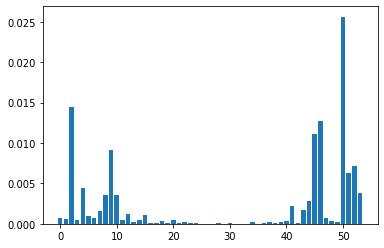

In [87]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RVTm.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [88]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)

importances_mea =  [6.73852506e-04 5.64593387e-04 1.45151081e-02 4.28880008e-04
 4.38651758e-03 1.00300642e-03 6.60900246e-04 1.58265772e-03
 3.59757893e-03 9.17366403e-03 3.50262533e-03 5.01945209e-04
 1.17426409e-03 2.75671850e-04 4.29937634e-04 1.05922150e-03
 1.11391489e-04 1.28379112e-04 3.42183740e-04 3.88106017e-05
 4.69073603e-04 5.95226485e-05 1.96095906e-04 8.43451670e-05
 8.21050582e-05 1.64798579e-05 1.98454190e-05 1.78779899e-05
 4.23018256e-05 2.60921454e-05 9.77911168e-05 2.99809012e-05
 3.57436277e-05 2.60333588e-05 2.81975801e-04 1.38308451e-05
 7.80266404e-05 2.11995069e-04 8.41354702e-05 2.50673747e-04
 2.91746216e-04 2.19975478e-03 4.58501229e-05 1.64786739e-03
 2.83025076e-03 1.11212556e-02 1.27164980e-02 7.26982858e-04
 3.74935947e-04 1.74666237e-04 2.56284361e-02 6.25783183e-03
 7.19815363e-03 3.84603882e-03]
importances_std =  [1.87362481e-05 2.48392996e-05 3.51030111e-04 1.18825611e-05
 2.04280304e-04 3.78332175e-05 2.23260840e-05 8.70901288e-05
 1.34485715e-04

In [89]:
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[2.43041014e+02 1.15313047e+02 5.84798062e+01 3.65278073e+01
 3.14169681e+01 1.52849258e+01 7.67203676e+00 2.65994389e+00
 9.35647019e-01 4.87859465e-01 2.82768778e-01 1.11866410e-01
 4.51091476e-02 1.36904406e-02 1.08879888e-02 3.82806220e-03
 2.14635172e-03 9.48358416e-04 3.27460968e-04 1.67371849e-04
 6.42392368e-05 3.71059952e-05 1.57814074e-05 1.28845013e-05
 9.86211059e-06 9.33819987e-06 4.41436340e-06 3.85202684e-06
 2.32521388e-06 1.84877334e-06 1.56231902e-06 1.54203362e-06
 1.34165341e-06 1.26705542e-06 1.08424859e-06 1.02809265e-06
 9.86047737e-07 8.76002113e-07 8.39965190e-07 7.94884373e-07
 7.60502906e-07 7.25621067e-07 6.76601487e-07 6.55083751e-07
 5.84805751e-07 5.56637082e-07 4.59079221e-07 4.42536990e-07
 3.94852607e-07 3.85471457e-07 3.03705971e-07 2.50406940e-07
 2.41599367e-07 2.25962012e-07]

Variances (Percentage):
[7.53353412e+01 1.69588546e+01 4.36165663e+00 1.70171501e+00
 1.25883313e+00 2.97965714e-01 7.50690594e-02 9.02369850e-03
 1.11651278e-03

C:\Users\user\AppData\Local\Temp/ipykernel_21032/1278985024.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RVTm.pdf", dpi=150, crop='true')


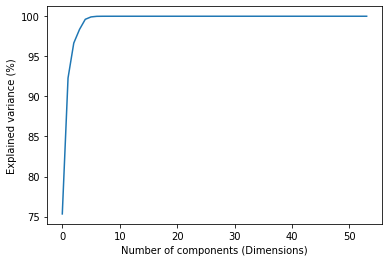

In [90]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RVTm.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [91]:
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))

Prediction for 484 inputs in 0.047394 s


In [92]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)

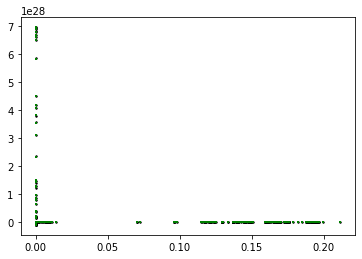

In [93]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:,1], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:,1], s=2, c='g', marker='+', label='ExtraTrees')

C:\Users\user\AppData\Local\Temp/ipykernel_21032/1274437029.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RVTm.pdf", dpi=150, crop='true')


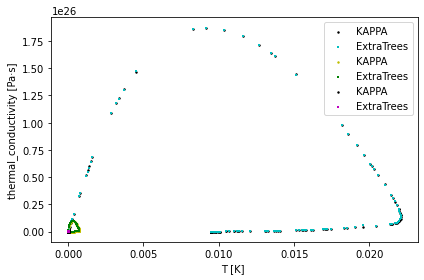

In [94]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:,10], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,10], y_regr_dim[:,10], s=2, c='c', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,20], y_test_dim[:,20], s=2, c='y', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,20], y_regr_dim[:,20], s=2, c='g', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,30], y_test_dim[:,30], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,30], y_regr_dim[:,30], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('thermal_conductivity [Pa·s]')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RVTm.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [95]:
# save the model to disk
dump(gs, 'N2N_RVTm.sav')

['N2N_RVTm.sav']

In [ ]:
#RVTa

In [97]:
x_va = df.iloc[:, :54].values 
y_va = df.iloc[:,195:242].values  

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_va, y_va, train_size=0.75, test_size=0.25, random_state=69)


In [100]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)#.reshape(-1,1))

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)

ValueError: X has 47 features, but StandardScaler is expecting 1 features as input.

In [ ]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

In [ ]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [ ]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]


In [ ]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

t0 = time.time()
gs.fit(x_train, y_train)#.ravel())
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)


In [ ]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()

In [ ]:
# Re-train with best parameters
regr = ExtraTreesRegressor(**gs.best_params_)
#regr = ExtraTreesRegressor()

# Training
##########
t0 = time.time()
regr.fit(x_train, y_train.ravel())
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)


In [ ]:
# perform permutation importance
################################
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RVTa.pdf", dpi=150, crop='true')
plt.show()
plt.close()


In [ ]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)


In [ ]:
# Principal Component Analysis (PCA)
####################################
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
#pca = PCA(n_components=2, svd_solver='full')
# pca = PCA(n_components=2, svd_solver='arpack')
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()


In [ ]:

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

In [ ]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RVTa.pdf", dpi=150, crop='true')
plt.show()
plt.close()


In [ ]:
# Prediction
############
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))


In [ ]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)


In [ ]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:], s=2, c='g', marker='+', label='ExtraTrees')


In [ ]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:,10], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,10], y_regr_dim[:,10], s=2, c='c', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,20], y_test_dim[:,20], s=2, c='y', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,20], y_regr_dim[:,20], s=2, c='g', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,30], y_test_dim[:,30], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,30], y_regr_dim[:,30], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('shear viscosity [Pa·s]')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RVTa.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [ ]:
# save the model to disk
########################
dump(gs, 'model_N2N_1_RVTa.sav')

In [ ]:
#RVV

In [101]:
x_vv = df.iloc[:, :54].values
y_vv = df.iloc[:,242:289].values

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_vv, y_vv, train_size=0.75, test_size=0.25, random_state=69)


In [103]:
sc_x = StandardScaler()
sc_y = StandardScaler()

# fit scaler
sc_x.fit(x_train)

# transform training dataset
x_train = sc_x.transform(x_train)

# transform test dataset
x_test = sc_x.transform(x_test)

# fit scaler on training dataset
sc_y.fit(y_train)#.reshape(-1,1))

# transform training dataset
y_train = sc_y.transform(y_train)

# transform test dataset
y_test = sc_y.transform(y_test)


In [104]:
dump(sc_x, open('scaler_x_shear.pkl', 'wb'))
dump(sc_y, open('scaler_y_shear.pkl', 'wb'))

print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1452, 54)
Training Labels Shape: (1452, 47)
Testing Features Shape: (484, 54)
Testing Labels Shape: (484, 47)


In [105]:
hyper_params = [{
#                 'n_estimators': (1, 50, 100,),
#                 'min_weight_fraction_leaf': (0.0, 0.25, 0.5,),
#                 'max_features': ('auto',),
#                 'max_features': ('sqrt', 'log2', 'auto',),
#                 'bootstrap': (True, False,),
#                 'oob_score': (True, False,),
#                 'warm_start': (True, False,),
#                 'criterion': ('mse', 'mae',),
#                 'max_depth': (1, 10, 100, None,),
#                 'max_leaf_nodes': (2, 100,),
#                 'min_samples_split': (2, 5, 10,),
#                 'min_impurity_decrease': (0.1, 0.2, 0.3, 0.5,),
#                 'min_samples_leaf': (1, 10, 100,),
}]


In [106]:
est=ensemble.RandomForestRegressor()
gs = GridSearchCV(est, cv=2, param_grid=hyper_params, verbose=2, n_jobs=n_jobs, scoring='r2')
#gs = est 

In [107]:
t0 = time.time()
gs.fit(x_train, y_train)#.ravel())
#gs.fit(x_train, y_train)
runtime = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % runtime)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Complexity and bandwidth selected and model fitted in 32.761337 s


In [108]:
train_score_mse = mean_squared_error(      sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_mae = mean_absolute_error(     sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_evs = explained_variance_score(sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
#train_score_me = max_error(               sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))
train_score_r2  = r2_score(                sc_y.inverse_transform(y_train), sc_y.inverse_transform(gs.predict(x_train)))

test_score_mse  = mean_squared_error(      sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_mae  = mean_absolute_error(     sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_evs  = explained_variance_score(sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
#test_score_me  = max_error(               sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))
test_score_r2   = r2_score(                sc_y.inverse_transform(y_test),  sc_y.inverse_transform(gs.predict(x_test)))

print()
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(train_score_mae))
print('MSE is {}'.format(train_score_mse))
print('EVS is {}'.format(train_score_evs))
#print('ME is {}'.format(train_score_me))
print('R2 score is {}'.format(train_score_r2))
print()
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(test_score_mae))
print('MSE is {}'.format(test_score_mse))
print('EVS is {}'.format(test_score_evs))
#print('ME is {}'.format(test_score_me))
print('R2 score is {}'.format(test_score_r2))
print()
print("Best parameters set found on development set:")
print(gs.best_params_)
print()


The model performance for training set
--------------------------------------
MAE is 2.9307316905340895e+22
MSE is 1.9480498501542178e+47
EVS is 0.9999078958167298
R2 score is 0.9999075361447516

The model performance for testing set
--------------------------------------
MAE is 8.563449008389597e+22
MSE is 1.4418681096308654e+48
EVS is 0.9993354662069058
R2 score is 0.9993273120491941

Best parameters set found on development set:
{}



In [111]:
# Re-train with best parameters
regr = ExtraTreesRegressor(**gs.best_params_)
#regr = ExtraTreesRegressor()

# Training
##########
t0 = time.time()
regr.fit(x_train, y_train)
#regr.fit(x_train, y_train)
regr_fit = time.time() - t0
print("Complexity and bandwidth selected and model fitted in %.6f s" % regr_fit)


Complexity and bandwidth selected and model fitted in 7.546398 s


In [112]:
# perform permutation importance
################################
# https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
results = permutation_importance(regr, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00243
Feature: 1, Score: 0.00091
Feature: 2, Score: 0.02987
Feature: 3, Score: 0.00874
Feature: 4, Score: 0.02959
Feature: 5, Score: 0.01918
Feature: 6, Score: 0.00191
Feature: 7, Score: 0.00118
Feature: 8, Score: 0.00110
Feature: 9, Score: 0.00086
Feature: 10, Score: 0.00055
Feature: 11, Score: 0.00255
Feature: 12, Score: 0.00062
Feature: 13, Score: 0.00039
Feature: 14, Score: 0.00107
Feature: 15, Score: 0.00032
Feature: 16, Score: 0.00031
Feature: 17, Score: 0.00039
Feature: 18, Score: 0.00048
Feature: 19, Score: 0.00068
Feature: 20, Score: 0.00170
Feature: 21, Score: 0.00077
Feature: 22, Score: 0.00069
Feature: 23, Score: 0.00195
Feature: 24, Score: 0.00063
Feature: 25, Score: 0.00302
Feature: 26, Score: 0.00114
Feature: 27, Score: 0.00155
Feature: 28, Score: 0.00229
Feature: 29, Score: 0.00288
Feature: 30, Score: 0.00228
Feature: 31, Score: 0.00138
Feature: 32, Score: 0.00306
Feature: 33, Score: 0.00397
Feature: 34, Score: 0.00219
Feature: 35, Score: 0.00340
Fe

C:\Users\user\AppData\Local\Temp/ipykernel_21032/641563014.py:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RVV.pdf", dpi=150, crop='true')


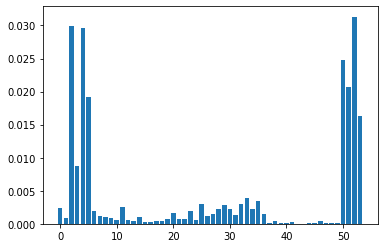

In [114]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/importance_RVV.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [115]:
print("importances_mea = ", results.importances_mean)
print("importances_std = ", results.importances_std)


importances_mea =  [2.43226224e-03 9.14199814e-04 2.98692514e-02 8.74180908e-03
 2.95945524e-02 1.91770120e-02 1.91296958e-03 1.17731813e-03
 1.09800869e-03 8.59257803e-04 5.52771111e-04 2.55070275e-03
 6.23880543e-04 3.87909693e-04 1.06602105e-03 3.19055185e-04
 3.14070709e-04 3.90167352e-04 4.76270644e-04 6.75526796e-04
 1.70331157e-03 7.74115251e-04 6.94387129e-04 1.95421993e-03
 6.29032874e-04 3.01901200e-03 1.13810390e-03 1.55268913e-03
 2.29386580e-03 2.87503508e-03 2.27523512e-03 1.38296934e-03
 3.06028961e-03 3.97302805e-03 2.18618480e-03 3.40070687e-03
 1.52372983e-03 1.80074330e-04 4.76159889e-04 7.92873018e-05
 1.23109343e-04 2.35095508e-04 3.14172844e-05 8.77089370e-06
 1.01605040e-04 6.22156347e-05 4.46751302e-04 1.51031595e-04
 1.30336136e-04 1.06826713e-04 2.47973882e-02 2.06387263e-02
 3.13276292e-02 1.63142311e-02]
importances_std =  [4.81247217e-05 2.09271864e-05 8.67970809e-04 1.32528666e-04
 8.40312455e-04 9.98004168e-04 4.53279861e-05 1.52147089e-05
 3.24747835e-05

In [116]:
# Principal Component Analysis (PCA)
####################################
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py
#pca = PCA(n_components=2, svd_solver='full')
# pca = PCA(n_components=2, svd_solver='arpack')
pca = PCA(n_components=None)
pca.fit(x_train)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.singular_values_)
print()

Eigenvalues:
[2.43041014e+02 1.15313047e+02 5.84798062e+01 3.65278073e+01
 3.14169681e+01 1.52849258e+01 7.67203676e+00 2.65994389e+00
 9.35647019e-01 4.87859465e-01 2.82768778e-01 1.11866410e-01
 4.51091476e-02 1.36904406e-02 1.08879888e-02 3.82806220e-03
 2.14635172e-03 9.48358416e-04 3.27460968e-04 1.67371849e-04
 6.42392368e-05 3.71059952e-05 1.57814074e-05 1.28845013e-05
 9.86211059e-06 9.33819987e-06 4.41436340e-06 3.85202684e-06
 2.32521388e-06 1.84877334e-06 1.56231902e-06 1.54203362e-06
 1.34165341e-06 1.26705542e-06 1.08424859e-06 1.02809265e-06
 9.86047737e-07 8.76002113e-07 8.39965190e-07 7.94884373e-07
 7.60502906e-07 7.25621067e-07 6.76601487e-07 6.55083751e-07
 5.84805751e-07 5.56637082e-07 4.59079221e-07 4.42536990e-07
 3.94852607e-07 3.85471457e-07 3.03705971e-07 2.50406940e-07
 2.41599367e-07 2.25962012e-07]



In [117]:
# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()


Variances (Percentage):
[7.53353412e+01 1.69588546e+01 4.36165663e+00 1.70171501e+00
 1.25883313e+00 2.97965714e-01 7.50690594e-02 9.02369850e-03
 1.11651278e-03 3.03549201e-04 1.01977071e-04 1.59602255e-05
 2.59518824e-06 2.39042142e-07 1.51194138e-07 1.86894962e-08
 5.87545363e-09 1.14705602e-09 1.36759878e-10 3.57276502e-11
 5.26308482e-12 1.75601327e-12 3.17637001e-13 2.11726321e-13
 1.24045028e-13 1.11215663e-13 2.48528266e-14 1.89242306e-14
 6.89549482e-15 4.35920169e-15 3.11299958e-15 3.03268505e-15
 2.29572732e-15 2.04753269e-15 1.49933042e-15 1.34804420e-15
 1.24003946e-15 9.78700774e-16 8.99833588e-16 8.05837627e-16
 7.37634770e-16 6.71520678e-16 5.83855694e-16 5.47309868e-16
 4.36177134e-16 3.95169932e-16 2.68791106e-16 2.49769141e-16
 1.98842696e-16 1.89506484e-16 1.17637635e-16 7.99709670e-17
 7.44442585e-17 6.51194151e-17]



C:\Users\user\AppData\Local\Temp/ipykernel_21032/1471451666.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RVV.pdf", dpi=150, crop='true')


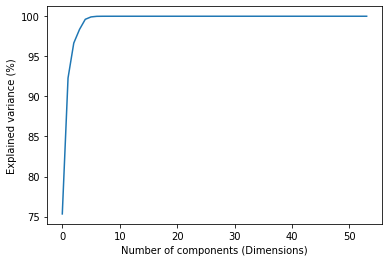

In [118]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/pca_RVV.pdf", dpi=150, crop='true')
plt.show()
plt.close()

In [119]:
# Prediction
############
t0 = time.time()
y_regr = regr.predict(x_test)
regr_predict = time.time() - t0
print("Prediction for %d inputs in %.6f s" % (x_test.shape[0], regr_predict))


Prediction for 484 inputs in 0.060752 s


In [120]:
x_test_dim = sc_x.inverse_transform(x_test)
y_test_dim = sc_y.inverse_transform(y_test)
y_regr_dim = sc_y.inverse_transform(y_regr)


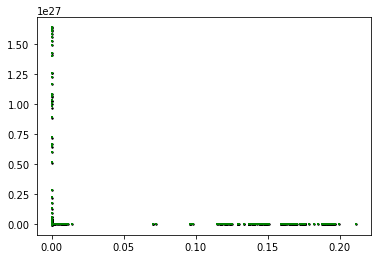

In [122]:
# temperature
plt.scatter(x_test_dim[:,1],  y_test_dim[:,1], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,1],  y_regr_dim[:,1], s=2, c='g', marker='+', label='ExtraTrees')


C:\Users\user\AppData\Local\Temp/ipykernel_21032/2165542608.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "crop" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RVV.pdf", dpi=150, crop='true')


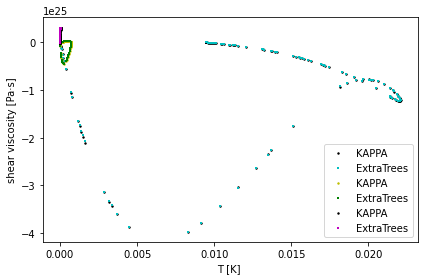

In [123]:
# molar fractions
plt.scatter(x_test_dim[:,10], y_test_dim[:,10], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,10], y_regr_dim[:,10], s=2, c='c', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,20], y_test_dim[:,20], s=2, c='y', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,20], y_regr_dim[:,20], s=2, c='g', marker='+', label='ExtraTrees')
plt.scatter(x_test_dim[:,30], y_test_dim[:,30], s=2, c='k', marker='o', label='KAPPA')
plt.scatter(x_test_dim[:,30], y_regr_dim[:,30], s=2, c='m', marker='+', label='ExtraTrees')
plt.ylabel('shear viscosity [Pa·s]')
plt.xlabel('T [K] ')
plt.legend()
plt.tight_layout()
plt.savefig("C:/Users/user/Feature_Selection/data/STS/kinetic/N2N_1/N2N_1_RVV.pdf", dpi=150, crop='true')
plt.show()
plt.close()


In [124]:
# save the model to disk
########################
dump(gs, 'model_N2N_1__RVV.sav')

['model_N2N_1__RVV.sav']